# Time series

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## Date and Time Data Types and Tools

In [155]:
from datetime import datetime, date
now = datetime.now()
now

datetime.datetime(2016, 1, 13, 21, 59, 39, 779287)

In [4]:
now.year, now.month, now.day

(2016, 1, 13)

In [14]:
delta = datetime(2013, 11, 19, 0, 5) - datetime(2013, 11, 18, 0, 0)
delta

datetime.timedelta(1, 300)

In [16]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [17]:
delta.days

926

In [18]:
delta.seconds

56700

In [19]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [20]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [21]:
stamp = datetime(2011, 1, 3)

In [22]:
str(stamp)

'2011-01-03 00:00:00'

In [23]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [24]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [25]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [26]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [27]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [28]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [29]:
datestrs

['7/6/2011', '8/6/2011']

In [30]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [31]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [32]:
['a', 'b', 'c'] + ['s']

['a', 'b', 'c', 's']

In [33]:
idx[2]

NaT

In [34]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

In [35]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.731695
2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [36]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [39]:
ts[::2]

2011-01-02   -0.731695
2011-01-07   -0.800685
2011-01-10   -2.092312
dtype: float64

In [38]:
ts + ts[::2]

2011-01-02   -1.463391
2011-01-05         NaN
2011-01-07   -1.601370
2011-01-08         NaN
2011-01-10   -4.184624
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [45]:
ts

2011-01-02   -0.731695
2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [46]:
stamp = ts.index[2]
ts[stamp]

-0.80068504387739514

In [47]:
ts['1/10/2011']

-2.0923118812204486

In [48]:
ts['20110110']

-2.0923118812204486

In [49]:
pd.date_range('1/1/2000', periods=10)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [50]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -1.086030
2000-01-02    0.488549
2000-01-03    0.230363
2000-01-04   -1.235154
2000-01-05    0.381951
2000-01-06    3.030618
                ...   
2002-09-21    0.021078
2002-09-22   -0.254350
2002-09-23    1.156161
2002-09-24   -0.113147
2002-09-25    0.183318
2002-09-26    0.359499
Freq: D, dtype: float64

In [51]:
longer_ts['2001']

2001-01-01   -0.051095
2001-01-02   -0.677765
2001-01-03   -0.147499
2001-01-04    2.623857
2001-01-05   -0.523377
2001-01-06    1.699961
                ...   
2001-12-26    0.184616
2001-12-27    0.418736
2001-12-28    0.245606
2001-12-29   -0.291756
2001-12-30    0.516982
2001-12-31    1.192346
Freq: D, dtype: float64

In [52]:
longer_ts['2001-05']

2001-05-01    1.020420
2001-05-02   -2.397436
2001-05-03   -1.422822
2001-05-04   -0.776895
2001-05-05   -0.485442
2001-05-06    1.541363
                ...   
2001-05-26   -1.477538
2001-05-27    0.585557
2001-05-28   -1.114565
2001-05-29    1.811527
2001-05-30   -1.319785
2001-05-31    0.818287
Freq: D, dtype: float64

In [54]:
ts

2011-01-02   -0.731695
2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [53]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [56]:
ts['1/6/2011':'1/12/2011']

2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [59]:
ts.truncate(after='1/8/2011')

2011-01-02   -0.731695
2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
dtype: float64

In [60]:
dates = [datetime(2011, 1, 7), datetime(2011, 1, 5), datetime(2011, 1, 2),
         datetime(2011, 1, 3), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts2 = Series(np.random.randn(6), index=dates)
ts2

2011-01-07   -0.083968
2011-01-05    0.711555
2011-01-02   -0.093572
2011-01-03   -1.183092
2011-01-10   -0.310234
2011-01-12    1.781916
dtype: float64

In [62]:
ts['1/3/2011': '1/10/2011']

2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
dtype: float64

In [65]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [66]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.177569,-0.876783,-0.496679,0.087514
2001-05-09,0.328224,-0.615857,-0.198657,1.197328
2001-05-16,-1.389897,-0.481688,-0.812870,-0.628985
2001-05-23,0.736708,1.238202,0.617002,2.347290
2001-05-30,-1.492441,-1.223849,-0.125070,-0.464376


### Time series with duplicate indices

In [67]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [68]:
dup_ts.index.is_unique

False

In [69]:
dup_ts['1/3/2000']  # not duplicated

4

In [71]:
type(dup_ts['1/3/2000']), type(dup_ts['1/2/2000'])

(numpy.int64, pandas.core.series.Series)

In [70]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [72]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [73]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [74]:
ts

2011-01-02   -0.731695
2011-01-05   -0.993449
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-10   -2.092312
2011-01-12    0.998494
dtype: float64

In [75]:
ts.resample('D')

2011-01-02   -0.731695
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.993449
2011-01-06         NaN
2011-01-07   -0.800685
2011-01-08    0.945882
2011-01-09         NaN
2011-01-10   -2.092312
2011-01-11         NaN
2011-01-12    0.998494
Freq: D, dtype: float64

### Generating date ranges

In [76]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [77]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [78]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range('1/1/2016', '12/1/2016', freq='BM')

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [80]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [81]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [82]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [83]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [84]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [85]:
Hour(2) + Minute(30)

<150 * Minutes>

In [86]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [87]:
rng = pd.date_range('1/1/2016', '9/1/2016', freq='WOM-3FRI')
list(rng)

[Timestamp('2016-01-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-02-19 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-03-18 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-04-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-05-20 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-06-17 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-07-15 00:00:00', offset='WOM-3FRI'),
 Timestamp('2016-08-19 00:00:00', offset='WOM-3FRI')]

### Shifting (leading and lagging) data

In [88]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.361582
2000-02-29    1.343609
2000-03-31   -0.449944
2000-04-30    0.649145
Freq: M, dtype: float64

In [92]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.361582
2000-03-31    1.343609
2000-04-30   -0.449944
Freq: M, dtype: float64

In [90]:
ts.shift(-2)

2000-01-31   -0.449944
2000-02-29    0.649145
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [91]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    2.715920
2000-03-31   -1.334877
2000-04-30   -2.442725
Freq: M, dtype: float64

In [93]:
ts.shift(2, freq='M')

2000-03-31    0.361582
2000-04-30    1.343609
2000-05-31   -0.449944
2000-06-30    0.649145
Freq: M, dtype: float64

In [94]:
ts.shift(3, freq='D')

2000-02-03    0.361582
2000-03-03    1.343609
2000-04-03   -0.449944
2000-05-03    0.649145
dtype: float64

In [96]:
ts.shift(1, freq='3D')

2000-02-03    0.361582
2000-03-03    1.343609
2000-04-03   -0.449944
2000-05-03    0.649145
dtype: float64

In [97]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.361582
2000-02-29 01:30:00    1.343609
2000-03-31 01:30:00   -0.449944
2000-04-30 01:30:00    0.649145
Freq: M, dtype: float64

In [98]:
ts

2000-01-31    0.361582
2000-02-29    1.343609
2000-03-31   -0.449944
2000-04-30    0.649145
Freq: M, dtype: float64

#### Shifting dates with offsets

In [99]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [100]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [102]:
type(MonthEnd())

pandas.tseries.offsets.MonthEnd

In [103]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [104]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [105]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [106]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.286675
2000-02-29   -0.011548
2000-03-31   -0.401561
dtype: float64

In [108]:
ts

2000-01-15   -1.009417
2000-01-19    0.575791
2000-01-23    1.861119
2000-01-27   -0.882511
2000-01-31    0.888393
2000-02-04    1.018647
                ...   
2000-03-11   -0.447046
2000-03-15   -0.936239
2000-03-19    0.844330
2000-03-23   -0.566286
2000-03-27   -0.494501
2000-03-31   -0.292935
Freq: 4D, dtype: float64

In [109]:
ts.resample('M', how='mean')

2000-01-31    0.286675
2000-02-29   -0.011548
2000-03-31   -0.401561
Freq: M, dtype: float64

## Time Zone Handling

In [110]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [111]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>

### Localization and Conversion

In [112]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.353207
2012-03-10 09:30:00    0.207366
2012-03-11 09:30:00    1.809846
2012-03-12 09:30:00   -0.423272
2012-03-13 09:30:00    1.022332
2012-03-14 09:30:00    1.003048
Freq: D, dtype: float64

In [113]:
print(ts.index.tz)

None


In [115]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D')

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-17 09:30:00', '2012-03-18 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [114]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [116]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.353207
2012-03-10 09:30:00+00:00    0.207366
2012-03-11 09:30:00+00:00    1.809846
2012-03-12 09:30:00+00:00   -0.423272
2012-03-13 09:30:00+00:00    1.022332
2012-03-14 09:30:00+00:00    1.003048
Freq: D, dtype: float64

In [118]:
ts.index

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [117]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [119]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.353207
2012-03-10 04:30:00-05:00    0.207366
2012-03-11 05:30:00-04:00    1.809846
2012-03-12 05:30:00-04:00   -0.423272
2012-03-13 05:30:00-04:00    1.022332
2012-03-14 05:30:00-04:00    1.003048
Freq: D, dtype: float64

In [123]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00   -0.353207
2012-03-10 09:30:00-05:00    0.207366
2012-03-11 09:30:00-04:00    1.809846
2012-03-12 09:30:00-04:00   -0.423272
2012-03-13 09:30:00-04:00    1.022332
2012-03-14 09:30:00-04:00    1.003048
Freq: D, dtype: float64

In [124]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.353207
2012-03-10 14:30:00+00:00    0.207366
2012-03-11 13:30:00+00:00    1.809846
2012-03-12 13:30:00+00:00   -0.423272
2012-03-13 13:30:00+00:00    1.022332
2012-03-14 13:30:00+00:00    1.003048
Freq: D, dtype: float64

In [125]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.353207
2012-03-10 15:30:00+01:00    0.207366
2012-03-11 14:30:00+01:00    1.809846
2012-03-12 14:30:00+01:00   -0.423272
2012-03-13 14:30:00+01:00    1.022332
2012-03-14 14:30:00+01:00    1.003048
Freq: D, dtype: float64

In [127]:
ts_eastern.tz_convert('Asia/Shanghai')

2012-03-09 22:30:00+08:00   -0.353207
2012-03-10 22:30:00+08:00    0.207366
2012-03-11 21:30:00+08:00    1.809846
2012-03-12 21:30:00+08:00   -0.423272
2012-03-13 21:30:00+08:00    1.022332
2012-03-14 21:30:00+08:00    1.003048
Freq: D, dtype: float64

In [126]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone-aware Timestamp objects

In [128]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [129]:
stamp.value

1299902400000000000

In [130]:
stamp_utc.value

1299902400000000000

In [131]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [134]:
stamp_moscow.value

1299891600000000000

In [132]:
stamp_utc.value

1299902400000000000

In [133]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [135]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [136]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [137]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [138]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [139]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.628084
2012-03-08 09:30:00   -0.937118
2012-03-09 09:30:00    0.137055
2012-03-12 09:30:00    0.436407
2012-03-13 09:30:00   -1.046969
2012-03-14 09:30:00   -1.556779
2012-03-15 09:30:00    0.581018
2012-03-16 09:30:00    0.985280
2012-03-19 09:30:00    0.599965
2012-03-20 09:30:00   -0.632498
Freq: B, dtype: float64

In [140]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [141]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [162]:
mydate = datetime(2007, 11, 17)
mydate

datetime.datetime(2007, 11, 17, 0, 0)

In [164]:
mydate + p

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'pandas._period.Period'

In [142]:
p + 5

Period('2012', 'A-DEC')

In [143]:
p - 2

Period('2005', 'A-DEC')

In [144]:
pd.Period('2014', freq='A-DEC') - p

7

In [145]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [146]:
Series(np.random.randn(6), index=rng)

2000-01    0.614156
2000-02    0.685201
2000-03    0.648751
2000-04   -0.847922
2000-05    1.084613
2000-06   -1.850715
Freq: M, dtype: float64

In [147]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='int64', freq='Q-DEC')

### Period Frequency Conversion

In [148]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [149]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [150]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [151]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [152]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [3]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.402630
2007   -0.438232
2008    0.595120
2009   -1.099752
Freq: A-DEC, dtype: float64

In [4]:
ts.asfreq('M', how='start')

2006-01    0.402630
2007-01   -0.438232
2008-01    0.595120
2009-01   -1.099752
Freq: M, dtype: float64

In [5]:
ts.asfreq('B', how='end')

2006-12-29    0.402630
2007-12-31   -0.438232
2008-12-31    0.595120
2009-12-31   -1.099752
Freq: B, dtype: float64

### Quarterly period frequencies

In [6]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [7]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [8]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [9]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [10]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [11]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [12]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and back)

In [14]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.347977
2000-02-29   -1.400697
2000-03-31   -0.301941
Freq: M, dtype: float64

In [15]:
pts

2000-01    0.347977
2000-02   -1.400697
2000-03   -0.301941
Freq: M, dtype: float64

In [16]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01   -0.538048
2000-01    0.294428
2000-01   -0.377239
2000-02   -0.285020
2000-02    1.093482
2000-02   -0.754418
Freq: M, dtype: float64

In [17]:
ts

2000-01-31    0.347977
2000-02-29   -1.400697
2000-03-31   -0.301941
Freq: M, dtype: float64

In [18]:
pts = ts.to_period()
pts

2000-01    0.347977
2000-02   -1.400697
2000-03   -0.301941
Freq: M, dtype: float64

In [19]:
pts.to_timestamp(how='end')

2000-01-31    0.347977
2000-02-29   -1.400697
2000-03-31   -0.301941
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [20]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
5      1960
       ... 
197    2008
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, dtype: float64

In [21]:
data.quarter

0      1
1      2
2      3
3      4
4      1
5      2
      ..
197    2
198    3
199    4
200    1
201    2
202    3
Name: quarter, dtype: float64

In [22]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')

In [23]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

In [24]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and Frequency Conversion

In [25]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M', how='mean')

2000-01-31   -0.187207
2000-02-29   -0.278317
2000-03-31   -0.087763
2000-04-30    0.013735
Freq: M, dtype: float64

In [26]:
ts

2000-01-01    0.944773
2000-01-02   -0.521752
2000-01-03   -0.114738
2000-01-04    1.224415
2000-01-05   -0.168231
2000-01-06   -1.283319
                ...   
2000-04-04    0.683577
2000-04-05   -2.650749
2000-04-06    0.860280
2000-04-07   -0.818534
2000-04-08   -0.207487
2000-04-09   -1.484964
Freq: D, dtype: float64

In [31]:
ts.resample('M', how='mean', kind='period')

2000-01   -0.187207
2000-02   -0.278317
2000-03   -0.087763
2000-04    0.013735
Freq: M, dtype: float64

### Downsampling

In [32]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [33]:
ts.resample('5min', how='sum')
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [34]:
ts.resample('5min', how='sum', closed='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [35]:
ts.resample('5min', how='sum', closed='left', label='left')

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [38]:
ts.resample('5min', how='sum', closed='right', label='left')

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [39]:
ts.resample('5min', how='sum', closed='left', label='right')

2000-01-01 00:05:00    10
2000-01-01 00:10:00    35
2000-01-01 00:15:00    21
Freq: 5T, dtype: int64

In [36]:
ts.resample('5min', how='sum', loffset='-1s')

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling

In [41]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [40]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [42]:
ts.resample('5min', how='ohlc', label='left', closed='left')

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [43]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, dtype: int64

In [45]:
ts.groupby(lambda x: x.month).count()

1    31
2    29
3    31
4     9
dtype: int64

In [53]:
ts.resample('MS', how='count')

2000-01-01    31
2000-02-01    29
2000-03-01    31
2000-04-01     9
Freq: MS, dtype: int64

In [54]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [56]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2016', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2016-01-06,-0.236604,0.286573,-1.266113,1.393726
2016-01-13,0.758280,1.724887,0.222240,-0.459023


In [57]:
df_daily = frame.resample('D')
df_daily

,Colorado,Texas,New York,Ohio
2016-01-06,-0.236604,0.286573,-1.266113,1.393726
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN
2016-01-09,NaN,NaN,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN
2016-01-12,NaN,NaN,NaN,NaN
2016-01-13,0.758280,1.724887,0.222240,-0.459023


In [58]:
frame.resample('D', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2016-01-06,-0.236604,0.286573,-1.266113,1.393726
2016-01-07,-0.236604,0.286573,-1.266113,1.393726
2016-01-08,-0.236604,0.286573,-1.266113,1.393726
2016-01-09,-0.236604,0.286573,-1.266113,1.393726
2016-01-10,-0.236604,0.286573,-1.266113,1.393726
2016-01-11,-0.236604,0.286573,-1.266113,1.393726
2016-01-12,-0.236604,0.286573,-1.266113,1.393726
2016-01-13,0.758280,1.724887,0.222240,-0.459023


In [59]:
frame.resample('D', fill_method='ffill', limit=2)

,Colorado,Texas,New York,Ohio
2016-01-06,-0.236604,0.286573,-1.266113,1.393726
2016-01-07,-0.236604,0.286573,-1.266113,1.393726
2016-01-08,-0.236604,0.286573,-1.266113,1.393726
2016-01-09,NaN,NaN,NaN,NaN
2016-01-10,NaN,NaN,NaN,NaN
2016-01-11,NaN,NaN,NaN,NaN
2016-01-12,NaN,NaN,NaN,NaN
2016-01-13,0.758280,1.724887,0.222240,-0.459023


In [60]:
frame.resample('W-THU', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2016-01-07,-0.236604,0.286573,-1.266113,1.393726
2016-01-14,0.758280,1.724887,0.222240,-0.459023


### Resampling with periods

In [61]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.993053,0.402760,0.130482,0.561566
2000-02,1.409515,-1.642153,-0.051655,1.139754
2000-03,0.229608,-0.643725,0.578320,-0.468248
2000-04,-0.068737,1.048903,-2.122695,0.046212
2000-05,-0.086882,-0.094006,-0.142066,-0.671396


In [62]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.124594,0.360712,0.042612,0.317380
2001,0.109955,-0.274968,-0.081576,-0.642971


In [63]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,-0.124594,0.360712,0.042612,0.317380
2000Q2,-0.124594,0.360712,0.042612,0.317380
2000Q3,-0.124594,0.360712,0.042612,0.317380
2000Q4,-0.124594,0.360712,0.042612,0.317380
2001Q1,0.109955,-0.274968,-0.081576,-0.642971
2001Q2,0.109955,-0.274968,-0.081576,-0.642971
2001Q3,0.109955,-0.274968,-0.081576,-0.642971
2001Q4,0.109955,-0.274968,-0.081576,-0.642971


In [64]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

,Colorado,Texas,New York,Ohio
2000Q1,-0.124594,0.360712,0.042612,0.317380
2000Q2,-0.124594,0.360712,0.042612,0.317380
2000Q3,-0.124594,0.360712,0.042612,0.317380
2000Q4,-0.124594,0.360712,0.042612,0.317380
2001Q1,0.109955,-0.274968,-0.081576,-0.642971
2001Q2,0.109955,-0.274968,-0.081576,-0.642971
2001Q3,0.109955,-0.274968,-0.081576,-0.642971
2001Q4,0.109955,-0.274968,-0.081576,-0.642971


In [65]:
annual_frame.resample('Q-MAR', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q4,-0.124594,0.360712,0.042612,0.317380
2001Q1,-0.124594,0.360712,0.042612,0.317380
2001Q2,-0.124594,0.360712,0.042612,0.317380
2001Q3,-0.124594,0.360712,0.042612,0.317380
2001Q4,0.109955,-0.274968,-0.081576,-0.642971
2002Q1,0.109955,-0.274968,-0.081576,-0.642971
2002Q2,0.109955,-0.274968,-0.081576,-0.642971
2002Q3,0.109955,-0.274968,-0.081576,-0.642971


## Time series plotting

In [66]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


In [75]:
close_px_all.head(12)

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
2003-01-10,7.36,21.97,29.03,927.57
2003-01-13,7.32,22.16,28.91,926.26
2003-01-14,7.30,22.39,29.17,931.66
2003-01-15,7.22,22.11,28.77,918.22


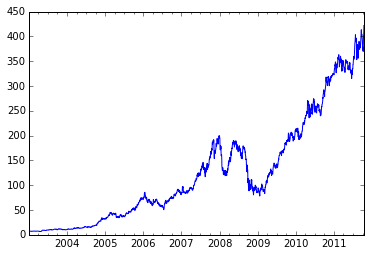

In [76]:
close_px['AAPL'].plot()

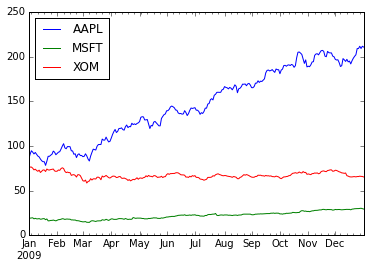

In [77]:
close_px.ix['2009'].plot()

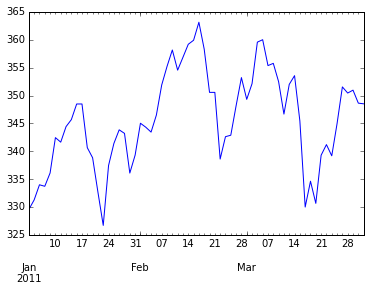

In [78]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

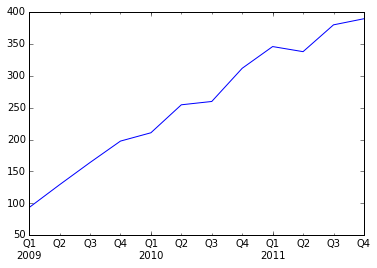

In [79]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

## Moving window functions

In [80]:
close_px = close_px.asfreq('B').fillna(method='ffill')

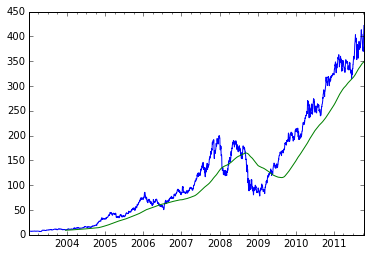

In [81]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

In [82]:
plt.figure()

In [83]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

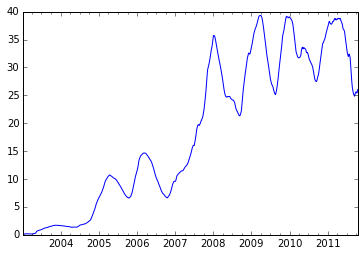

In [84]:
appl_std250.plot()

In [85]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

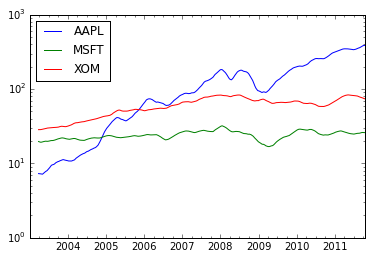

In [86]:
pd.rolling_mean(close_px, 60).plot(logy=True)

In [ ]:
plt.close('all')

### Exponentially-weighted functions

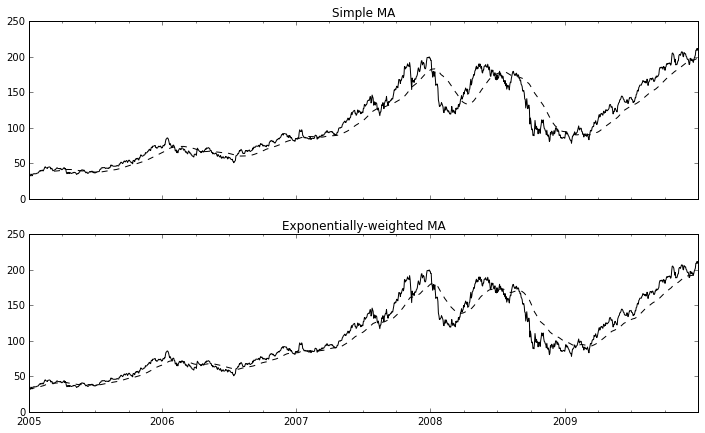

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [88]:
close_px
spx_px = close_px_all['SPX']

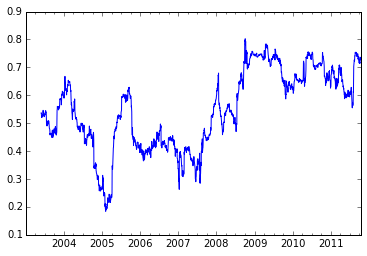

In [89]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

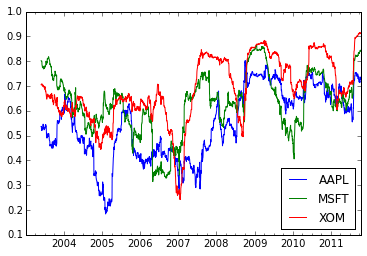

In [90]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

### User-defined moving window functions

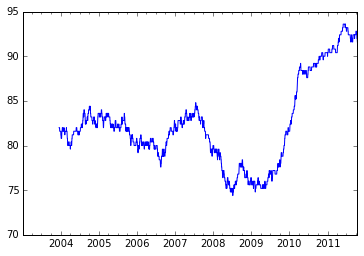

In [91]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [92]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    0.763618
2000-01-01 00:00:00.010    0.433766
2000-01-01 00:00:00.020   -1.033785
2000-01-01 00:00:00.030   -2.407479
2000-01-01 00:00:00.040   -1.929698
2000-01-01 00:00:00.050    0.782253
                             ...   
2000-01-02 03:46:39.940    1.760787
2000-01-02 03:46:39.950    1.306435
2000-01-02 03:46:39.960   -0.054280
2000-01-02 03:46:39.970    0.233183
2000-01-02 03:46:39.980    0.545651
2000-01-02 03:46:39.990    0.456484
Freq: 10L, dtype: float64

In [93]:
ts.resample('15min', how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [94]:
%timeit ts.resample('15min', how='ohlc')

10 loops, best of 3: 108 ms per loop


In [95]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

1 loops, best of 3: 140 ms per loop
